# Comparison of ML model and OGGM, PYGEM, GLOGEM on regional annual glacier-wide mass balance

In [51]:
# Import libraries
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.patches as mpatches


In [3]:
# Get glacier-wide mass balances

# Glaciological observations
filepath_obs = 'C:/Users/kasj/ML_MB_Norway/Data/NVE_gw_mb/massbalance_gw_Norway.csv'
df_obs = pd.read_csv(filepath_obs, sep=';')

# ML-model
filepath_pred = 'C:/Users/kasj/ML_MB_Norway/Data/glacier_predictions/with_predictions_2024-10-24_10-30-28/all_glaciers_predictions.csv'
#filepath_pred = 'C:/Users/kasj/ML_MB_Norway/Data/glacier_predictions/with_predictions_2024-10-25_09-45-30/all_glaciers_predictions.csv'
df_pred = pd.read_csv(filepath_pred)
df_pred = df_pred.rename(columns={'year':'Year','Ba_pred':'Ba','Bs_pred':'Bs','Bw_pred':'Bw'})

# GloGEM
filepath_glogem = 'C:/Users/kasj/ML_MB_Norway/Data/data_model_comparison/GLOGEM_annual_seasonal_glacier_wide.csv'
df_glogem = pd.read_csv(filepath_glogem)
df_glogem = df_glogem.rename(columns={'ID':'RGIID'})

# OGGM
filepath_oggm = 'C:/Users/kasj/ML_MB_Norway/Data/data_model_comparison/OGGM_annual_seasonal_glacier_wide.csv'
df_oggm = pd.read_csv(filepath_oggm)
df_oggm = df_oggm.rename(columns={'year':'Year'})

# PyGEM
filepath_pygem = 'C:/Users/kasj/ML_MB_Norway/Data/data_model_comparison/PYGEM_annual_seasonal_glacier_wide.csv'
df_pygem = pd.read_csv(filepath_pygem)

In [5]:
# Get data for common time period and merge with observations

test_glaciers = ['00434', '00449', '01013', '01026', '01258', '01286', '01484', '01598', '02384', '02650', '02916', '02918', '02920', '02969']
train_glaciers = ['00287','00295','00868','00966','00987','01126','01186','01217','01657','01779','02017','02436','02458','02643','02666','02962','02963','02966']
all_glaciers = test_glaciers + train_glaciers

# Set the start and end years for the filter
start_year = 1980
end_year = 2019

gl = 'test'

# Function to filter DataFrame based on RGIID ending and year range
def filter_df_by_rgiid_and_year(df, test_glaciers, start_year, end_year):
    return df[df['RGIID'].str.endswith(tuple(test_glaciers)) & (df['Year'] >= start_year) & (df['Year'] <= end_year)]

# Filter the DataFrames
df_obs_nonan = df_obs.dropna(subset=['RGIID'])

if gl == 'test':
    df_obs_nonan = filter_df_by_rgiid_and_year(df_obs_nonan, test_glaciers, start_year, end_year)
    df_pred_filtered = filter_df_by_rgiid_and_year(df_pred, test_glaciers, start_year, end_year)
    df_oggm_filtered = filter_df_by_rgiid_and_year(df_oggm, test_glaciers, start_year, end_year)
    df_glogem_filtered = filter_df_by_rgiid_and_year(df_glogem, test_glaciers, start_year, end_year)
    df_pygem_filtered = filter_df_by_rgiid_and_year(df_pygem, test_glaciers, start_year, end_year)
elif gl == 'all':
    df_obs_nonan = filter_df_by_rgiid_and_year(df_obs_nonan, all_glaciers, start_year, end_year)
    df_pred_filtered = filter_df_by_rgiid_and_year(df_pred, all_glaciers, start_year, end_year)
    df_oggm_filtered = filter_df_by_rgiid_and_year(df_oggm, all_glaciers, start_year, end_year)
    df_glogem_filtered = filter_df_by_rgiid_and_year(df_glogem, all_glaciers, start_year, end_year)
    df_pygem_filtered = filter_df_by_rgiid_and_year(df_pygem, all_glaciers, start_year, end_year)

# Function to rename columns based on model name
def rename_columns(df, model_name):
    return df.rename(columns={
        'Ba': f'Ba_{model_name}',
        'Bs': f'Bs_{model_name}',
        'Bw': f'Bw_{model_name}'
    })

# Renaming columns of the filtered DataFrames
df_obs_nonan = rename_columns(df_obs_nonan, 'Glaciological')
df_pred_filtered = rename_columns(df_pred_filtered, 'ML')
df_oggm_filtered = rename_columns(df_oggm_filtered, 'OGGM')
df_glogem_filtered = rename_columns(df_glogem_filtered, 'GloGEM')
df_pygem_filtered = rename_columns(df_pygem_filtered, 'PyGEM')

# Merging DataFrames on 'RGIID' and 'Year'
dfs = [df_pred_filtered, df_oggm_filtered, df_glogem_filtered, df_pygem_filtered]
#dfs = [df_obs_nonan, df_pred_filtered, df_oggm_filtered, df_glogem_filtered, df_pygem_filtered]
merged_df = dfs[0]

for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on=['RGIID', 'Year'], how='outer')

merged_df

,Year,Ba_ML,Bw_ML,Bs_ML,BREID,RGIID,Ba_OGGM,Bw_OGGM,Bs_OGGM,Ba_GloGEM,Bw_GloGEM,Bs_GloGEM,Ba_PyGEM,Bw_PyGEM,Bs_PyGEM
0,1980,-1.854728,1.768898,-3.623626,2320,RGI60-08.00434,-1.626255,2.128360,-3.754614,-1.7791,1.6583,-3.4374,-1.890020,2.111056,-4.001075
1,1981,0.169132,2.602573,-2.433441,2320,RGI60-08.00434,1.073543,3.993685,-2.920142,0.6827,2.8633,-2.1806,0.614563,3.528565,-2.914003
2,1982,-1.016326,2.031147,-3.047473,2320,RGI60-08.00434,-0.612871,2.296168,-2.909038,0.1771,1.9766,-1.7995,0.160895,2.474489,-2.313594
3,1983,-0.031561,2.613813,-2.645374,2320,RGI60-08.00434,1.013410,3.657972,-2.644562,0.8791,2.7590,-1.8799,0.993628,3.508433,-2.514805
4,1984,-0.345011,2.508157,-2.853168,2320,RGI60-08.00434,0.622619,3.746796,-3.124177,0.6311,2.9167,-2.2856,0.696375,3.637195,-2.940820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2015,1.809597,3.631776,-1.822178,3141,RGI60-08.02969,1.344163,3.653286,-2.309123,1.2732,2.6991,-1.4259,1.630081,3.771588,-2.141506
556,2016,-0.241537,3.091300,-3.332837,3141,RGI60-08.02969,-0.570878,2.973452,-3.544329,-0.0816,2.7854,-2.8670,-0.100690,3.772016,-3.872705
557,2017,0.295998,2.814312,-2.518315,3141,RGI60-08.02969,-0.472488,2.358645,-2.831133,0.3022,2.6099,-2.3077,0.315979,3.590301,-3.274321
558,2018,-0.218382,2.929892,-3.148274,3141,RGI60-08.02969,-0.988100,2.854169,-3.842269,-0.7503,2.5864,-3.3367,-0.810882,3.575969,-4.386851


In [16]:
# Get area from RGI6
area_file = 'C:/Users/kasj/ML_MB_Norway/Data/shape_files/08_rgi60_Scandinavia_hypso.csv'

df_area = pd.read_csv(area_file)
df_area = df_area.rename(columns = {'RGIId   ':'RGIID','                      Area':'Area'})

In [23]:
df_area['RGIID_last5'] = df_area['RGIID'].str[-5:]
df_area

,RGIID,GLIMSId,Area,25,75,125,175,225,275,325,...,2075,2125,2175,2225,2275,2325,2375,2425,2475,RGIID_last5
0,RGI60-08.00001,G033830E67930N,0.030,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,00001
1,RGI60-08.00002,G033500E67870N,0.030,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,00002
2,RGI60-08.00003,G033750E67820N,0.020,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,00003
3,RGI60-08.00004,G033770E67830N,0.020,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,00004
4,RGI60-08.00005,G016345E67139N,21.469,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,00005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412,RGI60-08.03413,G016604E68164N,0.098,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,03413
3413,RGI60-08.03414,G015213E66590N,0.389,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,03414
3414,RGI60-08.03415,G015203E66729N,0.056,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,03415
3415,RGI60-08.03416,G014296E66006N,14.152,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,03416


In [24]:
#test_glaciers = ['00434', '00449', '01013', '01026', '01258', '01286', '01484', '01598', '02384', '02650', '02916', '02918', '02920', '02969']
df_area_filtered = df_area[df_area['RGIID'].str[-5:].isin(test_glaciers)][['RGIID', 'Area']]

df_area_filtered

,RGIID,Area
433,RGI60-08.00434,47.472
448,RGI60-08.00449,2.799
1012,RGI60-08.01013,5.890
1025,RGI60-08.01026,0.804
1257,RGI60-08.01258,3.455
1285,RGI60-08.01286,10.346
1483,RGI60-08.01484,1.709
1597,RGI60-08.01598,5.621
2383,RGI60-08.02384,11.123
2649,RGI60-08.02650,2.908


In [25]:
merged_df = pd.merge(merged_df, df_area_filtered, on=['RGIID'], how='outer')

In [32]:
merged_df

,Year,Ba_ML,Bw_ML,Bs_ML,BREID,RGIID,Ba_OGGM,Bw_OGGM,Bs_OGGM,Ba_GloGEM,Bw_GloGEM,Bs_GloGEM,Ba_PyGEM,Bw_PyGEM,Bs_PyGEM,Area
0,1980,-1.854728,1.768898,-3.623626,2320,RGI60-08.00434,-1.626255,2.128360,-3.754614,-1.7791,1.6583,-3.4374,-1.890020,2.111056,-4.001075,47.472
1,1981,0.169132,2.602573,-2.433441,2320,RGI60-08.00434,1.073543,3.993685,-2.920142,0.6827,2.8633,-2.1806,0.614563,3.528565,-2.914003,47.472
2,1982,-1.016326,2.031147,-3.047473,2320,RGI60-08.00434,-0.612871,2.296168,-2.909038,0.1771,1.9766,-1.7995,0.160895,2.474489,-2.313594,47.472
3,1983,-0.031561,2.613813,-2.645374,2320,RGI60-08.00434,1.013410,3.657972,-2.644562,0.8791,2.7590,-1.8799,0.993628,3.508433,-2.514805,47.472
4,1984,-0.345011,2.508157,-2.853168,2320,RGI60-08.00434,0.622619,3.746796,-3.124177,0.6311,2.9167,-2.2856,0.696375,3.637195,-2.940820,47.472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2015,1.809597,3.631776,-1.822178,3141,RGI60-08.02969,1.344163,3.653286,-2.309123,1.2732,2.6991,-1.4259,1.630081,3.771588,-2.141506,23.000
556,2016,-0.241537,3.091300,-3.332837,3141,RGI60-08.02969,-0.570878,2.973452,-3.544329,-0.0816,2.7854,-2.8670,-0.100690,3.772016,-3.872705,23.000
557,2017,0.295998,2.814312,-2.518315,3141,RGI60-08.02969,-0.472488,2.358645,-2.831133,0.3022,2.6099,-2.3077,0.315979,3.590301,-3.274321,23.000
558,2018,-0.218382,2.929892,-3.148274,3141,RGI60-08.02969,-0.988100,2.854169,-3.842269,-0.7503,2.5864,-3.3367,-0.810882,3.575969,-4.386851,23.000


In [28]:
# Define regions
region_north = ['RGI60-08.01258', 'RGI60-08.01026', 'RGI60-08.02384','RGI60-08.01598','RGI60-08.01484']
region_maritime = ['RGI60-08.02650']
region_west = ['RGI60-08.00434', 'RGI60-08.01286', 'RGI60-08.02916','RGI60-08.02918','RGI60-08.02920','RGI60-08.02920']
region_cont = ['RGI60-08.00449', 'RGI60-08.01013']

In [34]:
regions = {
    'north': region_north,
    'maritime': region_maritime,
    'west': region_west,
    'cont': region_cont
}

# List of model columns to aggregate
model_columns = ['Ba_ML', 'Bw_ML', 'Bs_ML', 'Ba_OGGM', 'Bw_OGGM', 'Bs_OGGM', 
                 'Ba_GloGEM', 'Bw_GloGEM', 'Bs_GloGEM', 'Ba_PyGEM', 'Bw_PyGEM', 'Bs_PyGEM']

# Function to perform area-weighted aggregation
def area_weighted_aggregation(df, rgiid_list):
    filtered_df = df[df['RGIID'].isin(rgiid_list)]
    area_sum = filtered_df['Area'].unique().sum()

    
    for col in model_columns:
        filtered_df[col] = filtered_df[col] * filtered_df['Area']

    agg_df = filtered_df.groupby('Year').sum()
    
    for col in model_columns:
        agg_df[col] = agg_df[col] / area_sum
    
    return agg_df[model_columns]

# Perform the aggregation for each region
aggregated_results = {}
for region_name, rgiid_list in regions.items():
    aggregated_results[region_name] = area_weighted_aggregation(merged_df, rgiid_list)

# Display the results
#for region_name, agg_df in aggregated_results.items():
#    print(f"\nAggregated results for {region_name} region:")
#    print(agg_df)





C:\Users\kasj\AppData\Local\Temp\ipykernel_20156\1764932316.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[col] = filtered_df[col] * filtered_df['Area']
C:\Users\kasj\AppData\Local\Temp\ipykernel_20156\1764932316.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg_df = filtered_df.groupby('Year').sum()
C:\Users\kasj\AppData\Local\Temp\ipykernel_20156\1764932316.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [35]:
aggregated_results

{'north':          Ba_ML     Bw_ML     Bs_ML   Ba_OGGM   Bw_OGGM   Bs_OGGM  Ba_GloGEM  \
 Year                                                                          
 1980 -1.976336  1.708783 -3.685118 -2.241760  1.410402 -3.652163  -1.787640   
 1981 -0.379392  2.211588 -2.590980  0.414305  2.355775 -1.941470   0.283024   
 1982 -0.209919  2.062381 -2.272300  0.639102  2.050210 -1.411108   0.856285   
 1983 -0.351781  2.092150 -2.443931 -0.307917  1.809408 -2.117325  -0.142175   
 1984 -0.056092  2.290529 -2.346622 -0.060085  2.420869 -2.480954   0.180484   
 1985 -1.713289  1.426585 -3.139875 -1.303088  1.256428 -2.559516  -1.213134   
 1986 -0.546254  2.005257 -2.551510 -0.165982  2.234118 -2.400100  -0.024918   
 1987 -0.144327  2.133836 -2.278163  0.110934  1.866186 -1.755252   0.208585   
 1988 -1.709697  1.726796 -3.436493 -1.445960  1.680443 -3.126402  -1.738894   
 1989  0.637724  2.882583 -2.244859  0.958451  3.180460 -2.222009   1.162687   
 1990 -0.212012  2.676062 -2.88

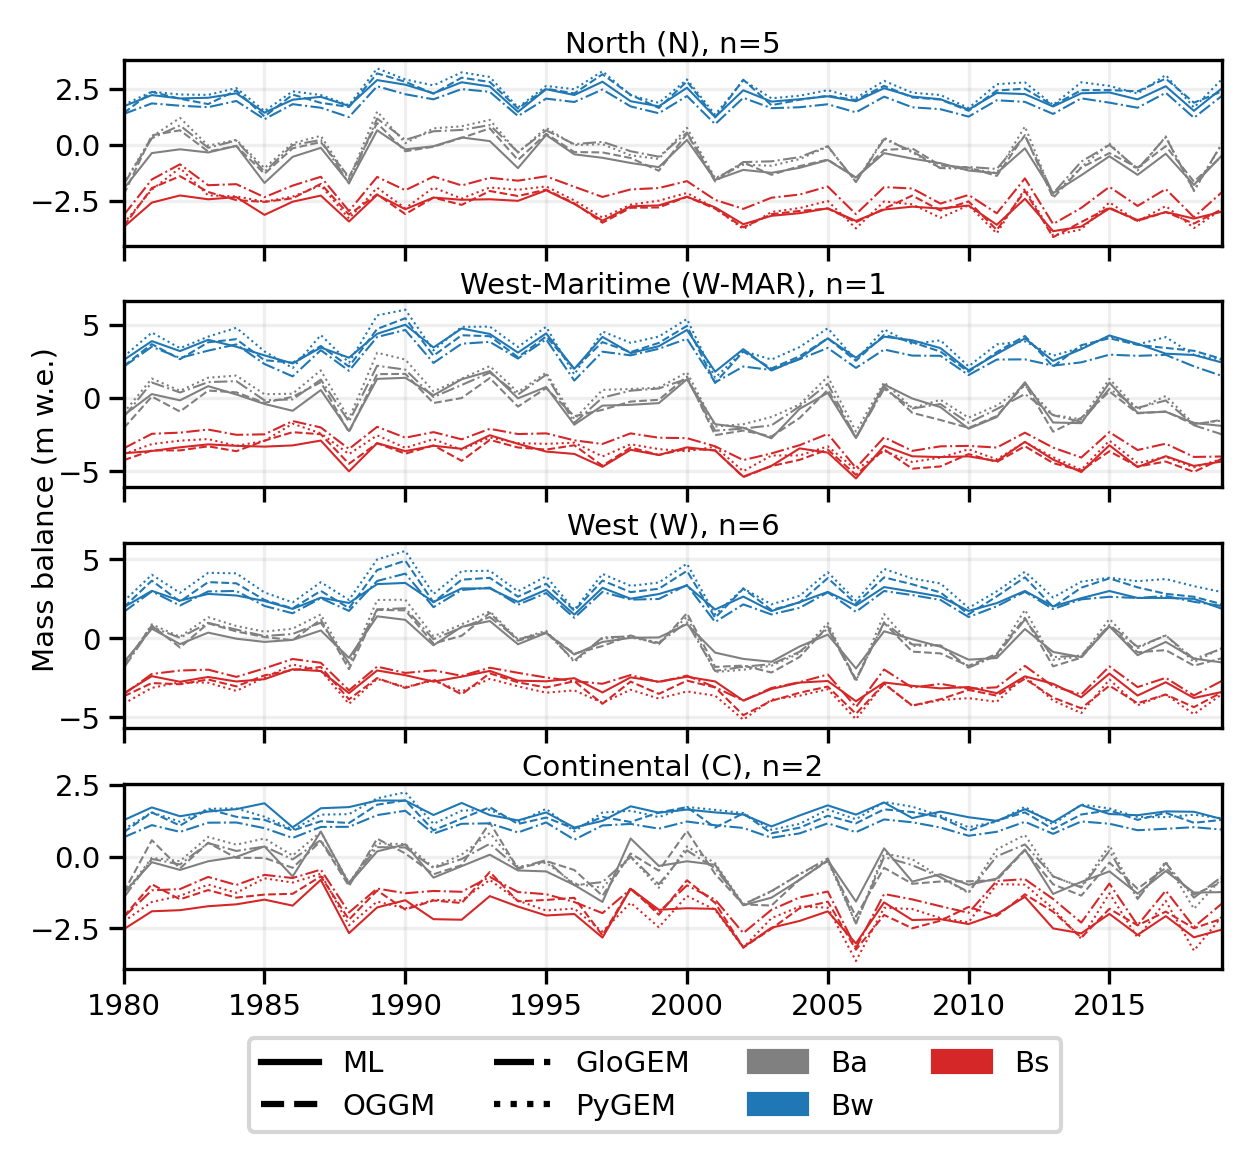

In [64]:
#region_north = ['RGI60-08.01258', 'RGI60-08.01026', 'RGI60-08.02384','RGI60-08.01598','RGI60-08.01484']
#region_maritime = ['RGI60-08.02650']
#region_west = ['RGI60-08.00434', 'RGI60-08.01286', 'RGI60-08.02916','RGI60-08.02918','RGI60-08.02920','RGI60-08.02920']
#region_cont = ['RGI60-08.00449', 'RGI60-08.01013']

# PLot time series for each region and model
cm = 1/2.54

fig, axes = plt.subplots(nrows=len(regions), ncols=1, figsize=(12*cm, 10*cm), dpi=300,sharex=True)

linestyles = {'ML': '-', 'OGGM': '--', 'GloGEM': '-.', 'PyGEM': ':'}
colors = {
    'Ba': 'grey',
    'Bw': 'C0',
    'Bs': 'C3'
}

for ax, (region_name, agg_df) in zip(axes, aggregated_results.items()):
    for i, col in enumerate(model_columns):
        model_key = col.split('_')[1]
        color_key = col.split('_')[0]
        ax.plot(agg_df.index, agg_df[col], label=col, linestyle=linestyles[model_key], color=colors[color_key], linewidth=0.5)
    ax.set_xlim([1980,2019])
    #ax.set_title(f'{region_name.capitalize()} region', fontsize=7, pad=2)
    ax.legend().remove()
    ax.grid(alpha=0.2)
    ax.tick_params(axis='both', which='major', labelsize=7, pad=2)

axes[0].set_title('North (N), n=5', fontsize=7, pad=2)
axes[1].set_title('West-Maritime (W-MAR), n=1', fontsize=7, pad=2)
axes[2].set_title('West (W), n=6', fontsize=7, pad=2)
axes[3].set_title('Continental (C), n=2', fontsize=7, pad=2)

#plt.xlabel('Year', fontsize=7)

# Create custom legend
legend_elements = []

# Add linestyles for models
for model_key, linestyle in linestyles.items():
    legend_elements.append(mlines.Line2D([], [], color='black', linestyle=linestyle, label=model_key))

# Add colors for Bs, Ba, Bw
for color_key, color in colors.items():
    legend_elements.append(mpatches.Patch(color=color, label=color_key))

fig.supylabel('Mass balance (m w.e.)', fontsize=7, x=0.06)
    
# Place legend at the bottom
fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.04), ncol=4, fontsize=7)

plt.subplots_adjust(hspace=0.3)
plt.show()


## Add observations where available

In [65]:
df_obs_nonan


,Year,RGIID,BREID,DateMinPrevYear,DateMax,DateMin,Area,Bw_Glaciological,Bs_Glaciological,Ba_Glaciological,Bcalv
2,1989,RGI60-08.01258,54,NaN,24.05.1989,19.10.1989,3.621,2.38,-2.98,-0.60,NaN
3,1990,RGI60-08.01258,54,19.10.1989,24.05.1990,05.09.1990,3.621,2.60,-2.98,-0.38,NaN
4,1991,RGI60-08.01258,54,05.09.1990,14.05.1991,04.10.1991,3.621,2.25,-2.29,-0.04,NaN
5,1992,RGI60-08.01258,54,04.10.1991,03.06.1992,22.09.1992,3.621,2.58,-2.37,0.22,NaN
6,1993,RGI60-08.01258,54,22.09.1992,15.05.1993,22.09.1993,3.621,2.49,-2.34,0.15,NaN
...,...,...,...,...,...,...,...,...,...,...,...
759,2013,RGI60-08.02969,3141,12.10.2012,29.05.2013,24.09.2013,22.541,2.49,-3.29,-0.80,NaN
760,2014,RGI60-08.02969,3141,24.09.2013,24.04.2014,14.10.2014,22.541,2.94,-3.68,-0.74,NaN
761,2015,RGI60-08.02969,3141,14.10.2014,22.04.2015,14.10.2015,22.541,2.90,-1.54,1.36,NaN
762,2016,RGI60-08.02969,3141,14.10.2015,28.04.2016,06.10.2016,22.539,2.92,-2.85,0.07,NaN


In [66]:
df_obs_nonan = df_obs_nonan.drop(columns=['Area'])

In [67]:
df_obs_area = pd.merge(df_obs_nonan, df_area_filtered, on=['RGIID'], how='outer')

In [68]:
df_obs_area

,Year,RGIID,BREID,DateMinPrevYear,DateMax,DateMin,Bw_Glaciological,Bs_Glaciological,Ba_Glaciological,Bcalv,Area
0,1989.0,RGI60-08.01258,54.0,NaN,24.05.1989,19.10.1989,2.38,-2.98,-0.60,NaN,3.455
1,1990.0,RGI60-08.01258,54.0,19.10.1989,24.05.1990,05.09.1990,2.60,-2.98,-0.38,NaN,3.455
2,1991.0,RGI60-08.01258,54.0,05.09.1990,14.05.1991,04.10.1991,2.25,-2.29,-0.04,NaN,3.455
3,1992.0,RGI60-08.01258,54.0,04.10.1991,03.06.1992,22.09.1992,2.58,-2.37,0.22,NaN,3.455
4,1993.0,RGI60-08.01258,54.0,22.09.1992,15.05.1993,22.09.1993,2.49,-2.34,0.15,NaN,3.455
...,...,...,...,...,...,...,...,...,...,...,...
180,2016.0,RGI60-08.02969,3141.0,14.10.2015,28.04.2016,06.10.2016,2.92,-2.85,0.07,NaN,23.000
181,2017.0,RGI60-08.02969,3141.0,06.10.2016,02.05.2017,09.10.2017,2.57,-2.92,-0.35,NaN,23.000
182,NaN,RGI60-08.00434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.472
183,NaN,RGI60-08.01013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.890


In [71]:
# Columns that need to be aggregated
obs_columns = ['Bw_Glaciological', 'Bs_Glaciological', 'Ba_Glaciological']

# Function to perform area-weighted aggregation with NaN handling
# Function to perform area-weighted aggregation with NaN handling
def area_weighted_aggregation_non_missing(df_obs, rgiid_list):
    # Filter data for the given region
    filtered_df = df_obs[df_obs['RGIID'].isin(rgiid_list)]
    
    # Initialize a result DataFrame with NaNs
    result_df = pd.DataFrame(index=np.arange(1980, 2020), columns=obs_columns)
    
    # Check for years where all RGIIDs have non-NaN observations
    valid_years = filtered_df.groupby('Year')[obs_columns].apply(lambda x: x.notna().all().all())
    valid_years = valid_years[valid_years].index
    
    if len(valid_years) > 0:
        # Filter the DataFrame to keep only valid years
        filtered_df = filtered_df[filtered_df['Year'].isin(valid_years)]
        
        # Perform area-weighted aggregation
        total_area = filtered_df.groupby('Year')['Area'].sum()
        
        for col in obs_columns:
            # Compute the area-weighted sum
            weighted_sum = filtered_df.groupby('Year').apply(lambda x: np.sum(x[col] * x['Area']))
            result_df.loc[valid_years, col] = weighted_sum / total_area
            
    return result_df

# Perform the aggregation for each region
agg_obs_results = {}
for region_name, rgiid_list in regions.items():
    agg_obs_results[region_name] = area_weighted_aggregation_non_missing(df_obs_area, rgiid_list)



In [72]:
agg_obs_results

{'north':      Bw_Glaciological Bs_Glaciological Ba_Glaciological
 1980              NaN              NaN              NaN
 1981              NaN              NaN              NaN
 1982              NaN              NaN              NaN
 1983              NaN              NaN              NaN
 1984              NaN              NaN              NaN
 1985              NaN              NaN              NaN
 1986              NaN              NaN              NaN
 1987              NaN              NaN              NaN
 1988             2.36            -3.95            -1.59
 1989         3.247056        -2.323515         0.923541
 1990         3.280427        -3.185726         0.094701
 1991         2.440796        -2.454948        -0.014151
 1992         3.174822        -2.419692         0.763545
 1993         2.936426        -2.377857          0.56378
 1994         1.727049        -2.128598        -0.401548
 1995              NaN              NaN              NaN
 1996             2.23

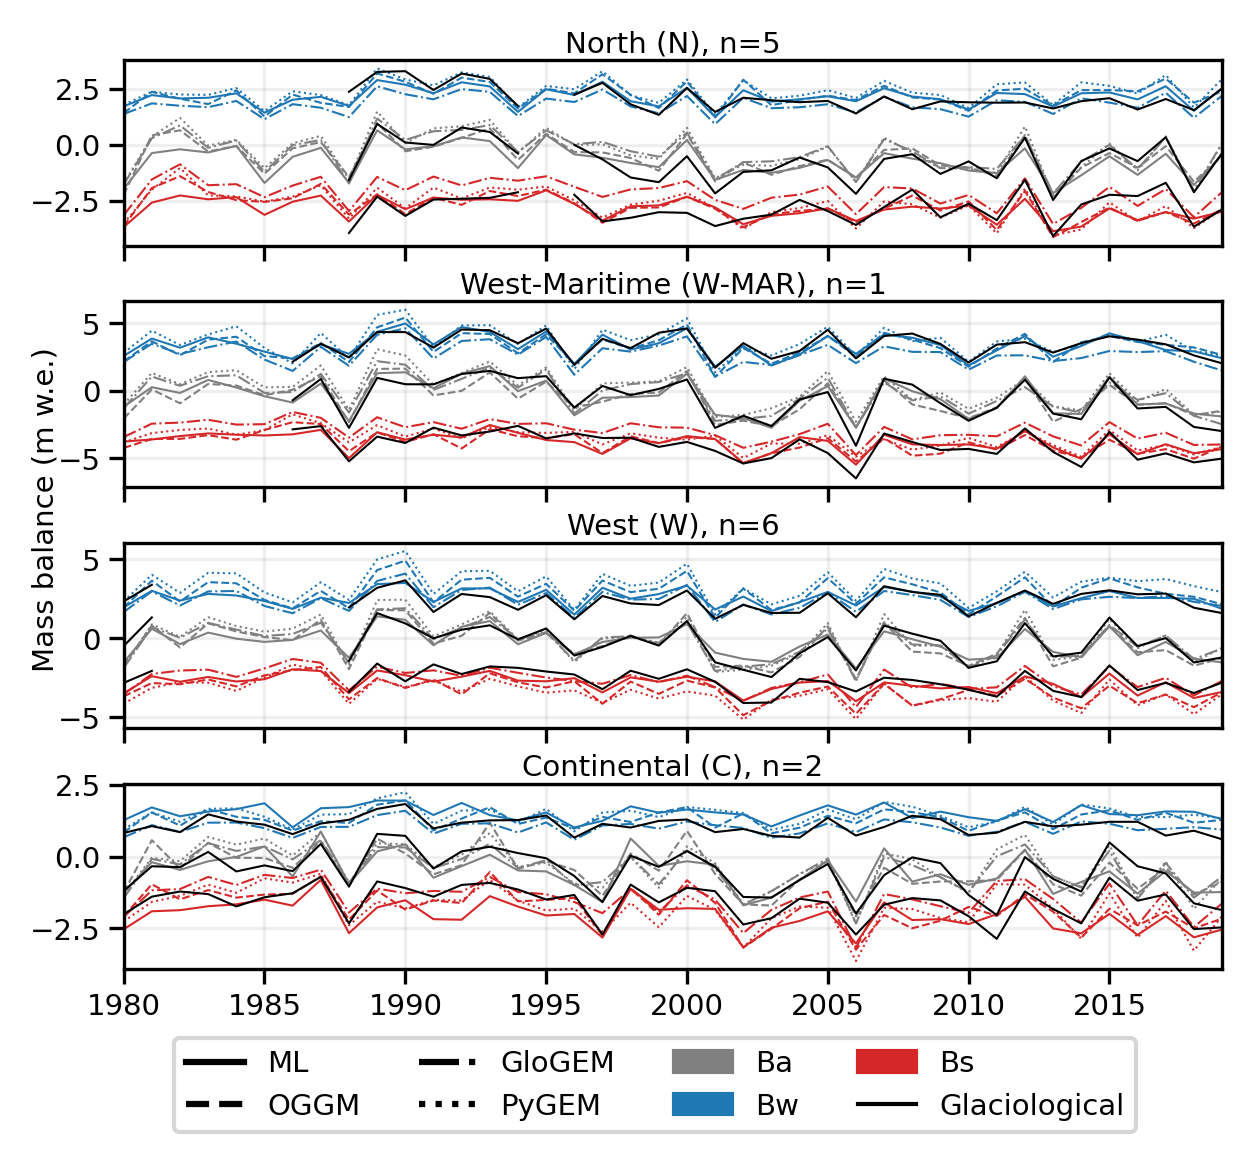

In [78]:
# Plotting
cm = 1/2.54

fig, axes = plt.subplots(nrows=len(regions), ncols=1, figsize=(12*cm, 10*cm), dpi=300, sharex=True)

linestyles = {'ML': '-', 'OGGM': '--', 'GloGEM': '-.', 'PyGEM': ':'}
colors = {
    'Ba': 'grey',
    'Bw': 'C0',
    'Bs': 'C3'
}

for ax, (region_name, agg_df) in zip(axes, aggregated_results.items()):
    # Plotting models
    for col in agg_df.columns:
        if '_' in col:  # Ensuring it includes only model data
            model_key = col.split('_')[1]
            color_key = col.split('_')[0]
            ax.plot(agg_df.index, agg_df[col], label=col, linestyle=linestyles[model_key], color=colors.get(color_key, 'black'), linewidth=0.5)
    
    # Plotting Glaciological observations
    agg_obs_df = agg_obs_results.get(region_name, pd.DataFrame())
    if not agg_obs_df.empty:
        for col in obs_columns:
            ax.plot(agg_obs_df.index, agg_obs_df[col], label=col.replace('_Glaciological', ''), linestyle='-', color='black', linewidth=0.5)

    ax.set_xlim([1980, 2019])
    ax.legend().remove()
    ax.grid(alpha=0.2)
    ax.tick_params(axis='both', which='major', labelsize=7, pad=2)

axes[0].set_title('North (N), n=5', fontsize=7, pad=2)
axes[1].set_title('West-Maritime (W-MAR), n=1', fontsize=7, pad=2)
axes[2].set_title('West (W), n=6', fontsize=7, pad=2)
axes[3].set_title('Continental (C), n=2', fontsize=7, pad=2)

# Create custom legend
legend_elements = []

# Add linestyles for models
for model_key, linestyle in linestyles.items():
    legend_elements.append(mlines.Line2D([], [], color='black', linestyle=linestyle, label=model_key))

# Add colors for Bs, Ba, Bw
for color_key, color in colors.items():
    legend_elements.append(mpatches.Patch(color=color, label=color_key))

# Add Glaciological observation line
legend_elements.append(mlines.Line2D([], [], color='black', linestyle='-', linewidth=1, label='Glaciological'))

fig.supylabel('Mass balance (m w.e.)', fontsize=7, x=0.06)

# Place legend at the bottom
fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.04), ncol=4, fontsize=7)

plt.subplots_adjust(hspace=0.3)
plt.show()


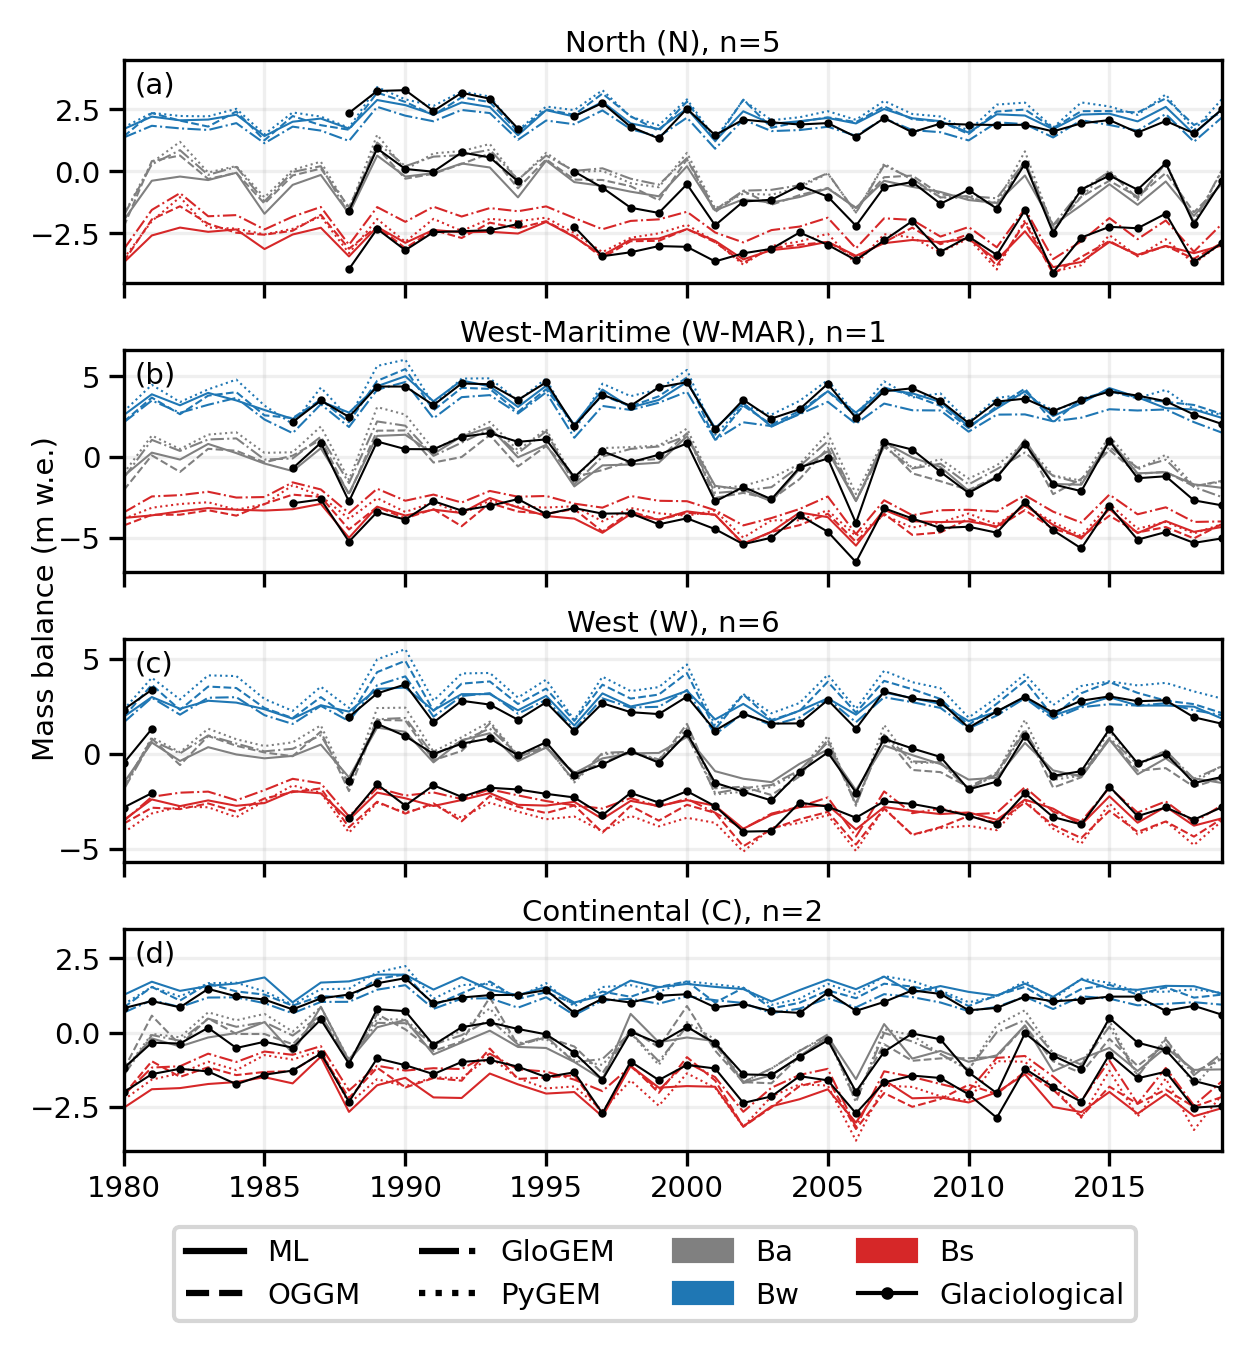

In [100]:
# Plotting
cm = 1/2.54

fig, axes = plt.subplots(nrows=len(regions), ncols=1, figsize=(12*cm, 12*cm), dpi=300, sharex=True)

linestyles = {'ML': '-', 'OGGM': '--', 'GloGEM': '-.', 'PyGEM': ':'}
colors = {
    'Ba': 'grey',
    'Bw': 'C0',
    'Bs': 'C3'
}

labels = ['(a)', '(b)', '(c)', '(d)']

for i, (ax, (region_name, agg_df)) in enumerate(zip(axes, aggregated_results.items())):
    # Plotting models
    for col in agg_df.columns:
        if '_' in col:  # Ensuring it includes only model data
            model_key = col.split('_')[1]
            color_key = col.split('_')[0]
            ax.plot(agg_df.index, agg_df[col], label=col, linestyle=linestyles[model_key], color=colors.get(color_key, 'black'), linewidth=0.5)
    
    # Plotting Glaciological observations as scatter points
    agg_obs_df = agg_obs_results.get(region_name, pd.DataFrame())
    if not agg_obs_df.empty:
        for col in obs_columns:
            ax.plot(agg_obs_df.index, agg_obs_df[col], linestyle='-', color='black', linewidth=0.5, zorder=3)  # Draw lines
            ax.scatter(agg_obs_df.index, agg_obs_df[col], label=col.replace('_Glaciological', ''), color='black', s=1, zorder=3)

    ax.set_xlim([1980, 2019])
    ax.legend().remove()
    ax.grid(alpha=0.2)
    ax.tick_params(axis='both', which='major', labelsize=7, pad=2)

    # Add subplot labels
    ax.text(0.01, 0.95, labels[i], transform=ax.transAxes, fontsize=7, va='top', ha='left')

axes[0].set_title('North (N), n=5', fontsize=7, pad=2)
axes[1].set_title('West-Maritime (W-MAR), n=1', fontsize=7, pad=2)
axes[2].set_title('West (W), n=6', fontsize=7, pad=2)
axes[3].set_title('Continental (C), n=2', fontsize=7, pad=2)

axes[0].set_ylim([-4.5,4.5])
axes[3].set_ylim([-4,3.5])

# Create custom legend
legend_elements = []

# Add linestyles for models
for model_key, linestyle in linestyles.items():
    legend_elements.append(mlines.Line2D([], [], color='black', linestyle=linestyle, label=model_key))

# Add colors for Bs, Ba, Bw
for color_key, color in colors.items():
    legend_elements.append(mpatches.Patch(color=color, label=color_key))

# Add Glaciological observation points
legend_elements.append(mlines.Line2D([], [], color='black', linestyle='-', linewidth=1, marker='o', markersize=2, label='Glaciological'))

fig.supylabel('Mass balance (m w.e.)', fontsize=7, x=0.06)

# Place legend at the bottom
fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.02), ncol=4, fontsize=7)

plt.subplots_adjust(hspace=0.3)

pdf_path = 'C:/Users/kasj/OneDrive - Høgskulen på Vestlandet/Projects/2022_ML_for_MB_Norway/Figures_paper/'
plt.savefig(pdf_path+'comparison_models_regional_timeseries.pdf', format='pdf', bbox_inches='tight')

plt.show()
